# Overview

1. Logistic Regression
2. KNN
3. Decision Tree
4. Random Forest
5. Naive Bayes
6. Linear SVM
7. RBF SVM
8. AdaBoost
9. Bagging
10. LDA
11. QDA
12. XGBoost
13. Stacking (mlxtend)
14. Majority vote
15. Majority Vote with grid search
   - Assign best parameter for predict
16. Feature importance
17. Model selection by feature importance


In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

E:\Programming\Python\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
### Read Datset  


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:

#### df[row,column]

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [4]:
#### Standardize  ###

#### Standardize can make learning converge faster and avoid weights too large or too small   ###

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

##### Fit training set
sc.fit(X_train)

####  Use same fitted Scaler to training and testing

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


# Logistics Regression   
- Binary classifier 
- Sklearn support OVR multiclass classifier

- Hyperparameter: 
  - l1 >> sparse matrix, many w will be zero
  - l2 >> focus on w**2  smooth the effect of w
  -  C = Inverse of regularization strength, default = 1
  - multi_class >> default 'OVR' : one versus rest

In [5]:

from sklearn.linear_model import LogisticRegression



lr = LogisticRegression(penalty = 'l1',C = 0.1,multi_class = 'ovr')
lr.fit(X_train_std,y_train)

print("training accuracy: ", lr.score(X_train_std,y_train))
print("testing accuracy:  ",lr.score(X_test_std,y_test))

training accuracy:  0.983870967742
testing accuracy:   0.981481481481


# KNN   
- Learning only occure when testing data need to be classified >> lazy learning method
- Classify according to k cloest neighbor
- Bad for spare dimension
- Multiclass classifier

- p: Power parameter for the Minkowski metric.
- metric: The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
- See distance matrix for more detail

In [6]:




from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(X_train_std, y_train)

print("training accuracy: ", knn.score(X_train_std,y_train))
print("testing accuracy:  ",knn.score(X_test_std,y_test))



training accuracy:  0.975806451613
testing accuracy:   1.0


# Decision Tree   

-  Don't need much preprocessing, ex: labelencoder,  standardize</p>
-  In Sklearn, used CART binary tree
-  CART can support categorical target (regression tree)
-  CART >> feature can be categorical or numerical, target can be categorical, contruct binary trees

### parameters

- criterion: 'entropy', 'gini'


In [8]:


from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

### Standardize not necessary
tree.fit(X_train, y_train)

print("training accuracy: ", tree.score(X_train,y_train))
print("testing accuracy:  ",tree.score(X_test,y_test))




training accuracy:  1.0
testing accuracy:   0.944444444444



#                                Random Forest


- Boosting >> 放回抽樣， feature 為隨機選取 >> increase bias but decrease variance

- 可以做feature selection

- 能有效處理高維度資料且不須降維

- oob誤分率是隨機森林泛化誤差的一個無偏估計，它的結果近似於需要大量計算的k折交叉驗證。

###  Parameters:

- oob score >> out of bag error, bootstrap error

- n_estimator >> number of trees

- criterion = 'gini' or 'entropy'

- max_features = sqrt(n_features) for classify,  max_features = n_features for regression, 若不知道可設auto



oob_score(accuary): 0.967741935484
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       1.00      0.95      0.98        22
          3       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        54

 1) Color intensity                0.185338
 2) Flavanoids                     0.162484
 3) Proline                        0.151174
 4) OD280/OD315 of diluted wines   0.118238
 5) Alcohol                        0.098663
 6) Hue                            0.088125
 7) Total phenols                  0.056951
 8) Alcalinity of ash              0.043780
 9) Magnesium                      0.023479
10) Malic acid                     0.022186
11) Proanthocyanins                0.022091
12) Nonflavanoid phenols           0.013939
13) Ash                            0.013552


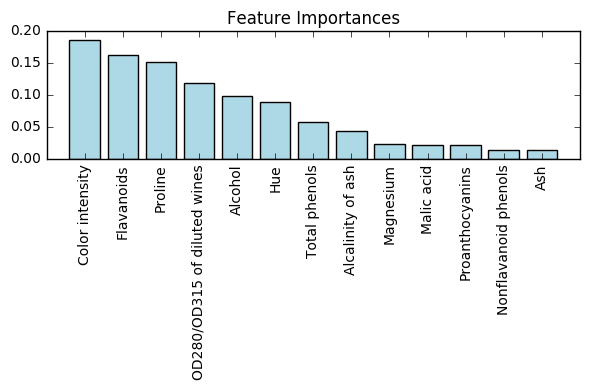

In [9]:

#### Random Forest Start Here   #######

### Boosting >> 放回抽樣
### 可以做feature selection
### oob score >> out of bag error
### n_estimator >> number of trees
### criterion = 'gini' or 'entropy'


from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
rfc.fit(X_train, y_train) #不標準化



print("oob_score(accuary):",rfc.oob_score_)
print(metrics.classification_report(y_test, rfc.predict(X_test)))

#### plot the importance
feat_labels = df_wine.columns[1:]
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]


for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

# Naive Bayes

- Features are independent
- Fast

####  1.GaussianNB for classification  (General machine learning)

####  2.MultinomialNB for text count classification  (tf-idf, word count)

####  3.BernoulliNB for text with binary kind data  (true or false)

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std,y_train)

print(metrics.classification_report(y_test,gnb.predict(X_test_std)))
print(metrics.confusion_matrix(y_test,gnb.predict(X_test_std)))

             precision    recall  f1-score   support

          1       0.90      1.00      0.95        19
          2       1.00      0.86      0.93        22
          3       0.93      1.00      0.96        13

avg / total       0.95      0.94      0.94        54

[[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]


#  SVM

- Effective for high dimensions

- Still effective in cases where number of dimensions is greater than the number of samples.

- Memory efficient.


### Disavantages:

1. If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and   regularization term is crucial.

2. SVMs do not directly provide probability estimates


##### Parameters:

- C >> decide the margin, C large --> hard margin, C small --> soft margin

- soft margin can tolerate more incorrected points --> 較大邊界

- gamma >> control size of the radial basis function kernel. Large gamma = complex model

-  kernel = 'rbf'  >> Gausian kernel,  project to higer dimension

-  Multi-class  >> one against one

### 1.LINEAR SVM

In [12]:
from sklearn.svm import SVC
linearSVM = SVC(kernel = 'linear',C = 10**10)
linearSVM.fit(X_train_std,y_train)


print(metrics.classification_report(y_test,linearSVM.predict(X_test_std)))
print(metrics.confusion_matrix(y_test,linearSVM.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       1.00      1.00      1.00        22
          3       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        54

[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


### 2. KERNEL SVM

- For nonlinear data, projected to higher dimension

In [13]:
from sklearn.svm import SVC
kernelSVM = SVC(kernel = 'rbf', C = 10**6,gamma = 0.00001)
kernelSVM.fit(X_train_std,y_train)

print(metrics.classification_report(y_test,kernelSVM.predict(X_test_std)))
print(metrics.confusion_matrix(y_test,kernelSVM.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       1.00      1.00      1.00        22
          3       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        54

[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


# AdaBoost

- fit a sequence of weak learners  on repeatedly modified versions of the data. 

- raining examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased

- no need feature selection, don't need to worry about overfitting

- Sensitive to outlier

In [14]:
from sklearn.ensemble import AdaBoostClassifier

### define weak learner
tree = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = 1,
                             random_state = 0)
### if not choosr base_estimator >>　default is decision tree
ada = AdaBoostClassifier(base_estimator = tree,
                        n_estimators =  500,
                        learning_rate = 0.1,
                        random_state = 0)
ada.fit(X_train_std,y_train)

print(metrics.classification_report(y_test,ada.predict(X_test_std)))
print(metrics.confusion_matrix(y_test,ada.predict(X_test_std)))


             precision    recall  f1-score   support

          1       0.95      0.95      0.95        19
          2       0.95      0.91      0.93        22
          3       0.93      1.00      0.96        13

avg / total       0.94      0.94      0.94        54

[[18  1  0]
 [ 1 20  1]
 [ 0  0 13]]


# Bagging

- 放回抽樣, Weak learner

- 每次訓練只使用到部分樣本， reduce bias

- Majority vote  

#### Parameters:

-   max_samples: number of samples to train base estimator
-   max_features:If int, then draw max_features features
-   bootstrap : 放回抽樣



In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = None,
                             random_state = 1)

bag = BaggingClassifier(base_estimator = tree,
                       n_estimators = 500,
                       max_samples = 1.0,
                       max_features = 1.0,
                       bootstrap = True,
                       bootstrap_features = False,
                       n_jobs = -1,
                       random_state=  0)
bag.fit(X_train_std,y_train)

print(metrics.classification_report(y_test,bag.predict(X_test_std)))
print(metrics.confusion_matrix(y_test,bag.predict(X_test_std)))


             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       1.00      0.95      0.98        22
          3       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        54

[[19  0  0]
 [ 0 21  1]
 [ 0  0 13]]


# LDA, QDA 

- No hyperparameters to tune
- LDA only generate linear decision boundary
- QDA more flexible

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train_std,y_train)


QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train_std,y_train)


print(metrics.classification_report(y_test,LDA.predict(X_test_std)))
print(metrics.confusion_matrix(y_test,LDA.predict(X_test_std)))


print(metrics.classification_report(y_test,QDA.predict(X_test_std)))
print(metrics.confusion_matrix(y_test,QDA.predict(X_test_std)))


             precision    recall  f1-score   support

          1       0.95      1.00      0.97        19
          2       1.00      0.95      0.98        22
          3       1.00      1.00      1.00        13

avg / total       0.98      0.98      0.98        54

[[19  0  0]
 [ 1 21  0]
 [ 0  0 13]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       1.00      1.00      1.00        22
          3       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        54

[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


# XGBoost

## 可看成 Random Forest 強化版

- XGBoost以“正則化提升(regularized boosting)”技術而聞名
- XGBoost可以實現並行處理，相比GBM有了速度的飛躍。
- XGBoost 也支持Hadoop實現。
- XGBoost內置處理缺失值的規則。
####    用戶需要提供一個和其它樣本不同的值，然後把它作為一個參數傳進去，以此來作為缺失值的取值。XGBoost在不同節點遇到缺失值時  #### 采用不同的處理方法，並且會學習未來遇到缺失值時的處理方法。
<br>
- XGBoost會一直分裂到指定的最大深度(max_depth)，然後回過頭來剪枝。如果某個節點之後不再有正值，它會去除這個分裂。
- XGBoost允許在每一輪boosting叠代中使用交叉驗證。因此，可以方便地獲得最優boosting叠代次數。
- XGBoost可以在上一輪的結果上繼續訓練。這個特性在某些特定的應用上是一個巨大的優勢。



### Sklearn 中有XGBClassifier 

#### from xgboost.sklearn import XGBClassifier

- eta --> learning_rate
- lambda --> reg_lambda
- alpha --> reg_alpha


詳細說明: 
         <p>(ENG) https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/</p>
         <p>(CHT) http://www.itread01.com/articles/1476146171.html</p>

- xgb - 直接引用xgboost。接下來會用到其中的“cv”函數。
- XGBClassifier - 是xgboost的sklearn包。這個包允許我們像GBM一樣使用Grid Search 和並行處理


###  Key parameters

- 1、learning_rate = 0.01~0.2
- 2、max_depth: 樹的最大深度，big >> overfit, small >> underfit。 典型值：3-10 
- 3、min_child_weight: 決定最小葉子節點樣本權重和。 use to avoid overfitting，數值過大 >> Underfitting, 過小: overfit。 (可參考1~6)
- 4、gamma = 0: 起始值也可以選其它比較小的值，在0.1到0.2之間就可以。這個參數後繼也是要調整的。 
- 5、subsample,colsample_bytree = 0.8: 這個是最常見的初始值了。典型值的範圍在0.5-0.9之間。
- 6、 scale_pos_weight: 在各類別樣本十分不平衡時，把這個參數設定為一個正值，可以使算法更快收斂。

#### objective: 這個參數定義需要被最小化的損失函數。最常用的值有
binary:logistic 二分類的邏輯回歸，返回預測的概率(不是類別)。
multi:softmax 使用softmax的多分類器，返回預測的類別(不是概率)。在這種情況下，你還需要多設一個參數：num_class(類別數目)。
multi:softprob 和multi:softmax參數一樣，但是返回的是每個數據屬於各個類別的概率。 
eval_metric:[默認值取決於objective參數的取值], 對於有效數據的度量方法。 對於回歸問題，默認值是rmse，對於分類問題，默認值是error。
選擇: rmse, mae, logloss, error(二分類錯誤率(閾值為0.5)),merror (多分類錯誤率), mlogloss (多分類logloss損失函數), auc

In [17]:
import xgboost as xgb

gbm = xgb.XGBClassifier(n_estimators = 2000,max_depth = 4,gamma = 0).fit(X_train, y_train)
print(metrics.classification_report(y_test,gbm.predict(X_test)))
print("Score:", gbm.score(X_test,y_test))

             precision    recall  f1-score   support

          1       0.95      1.00      0.97        19
          2       1.00      0.91      0.95        22
          3       0.93      1.00      0.96        13

avg / total       0.97      0.96      0.96        54

Score: 0.962962962963


[ 0.08918129  0.08333334  0.02777778  0.03508772  0.07602339  0.0497076
  0.14473684  0.01754386  0.01315789  0.21491228  0.04385965  0.03216374
  0.17251462]


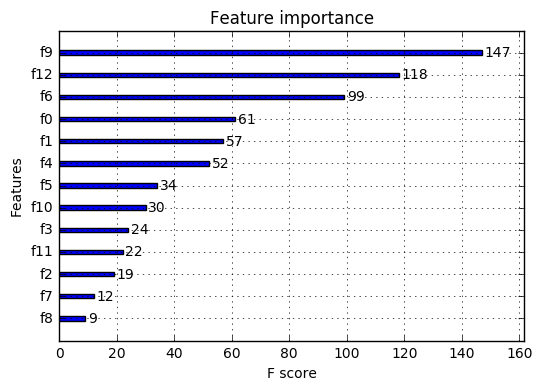

In [18]:
### show feature labels
print(gbm.feature_importances_)
from xgboost import plot_importance
plot_importance(gbm, )
plt.show()

# Stacking

### Can use mlxtend

- stacking is most effective when the base models are significantly different. 
- Stacking leakage and need to be careful

- Stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The base level models are trained based on complete training set then the meta-model is trained on the outputs of base level model as features. The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous.


In [19]:
from mlxtend.classifier import StackingClassifier

clf1 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform')
clf2 = RandomForestClassifier(n_estimators = 500,criterion = 'gini',
                             max_features = 'auto',oob_score = True)
clf3 = GaussianNB()
clf4 = SVC(C = 1.0,kernel = "rbf",probability = True)

meta_clf = xgb.XGBClassifier(n_estimators = 2000,max_depth = 4)

### clf1~clf4先做第一層,當input 送進 meta_clf

stacking_clf = StackingClassifier(classifiers = [clf1,clf2,clf3,clf4],meta_classifier = meta_clf)

clf1.fit(X_train_std, y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train_std,y_train)
clf4.fit(X_train_std,y_train)
stacking_clf.fit(X_train_std,y_train)

print('KNN Score:',clf1.score(X_test_std, y_test))
print('RF Score:',clf2.score(X_test, y_test))
print('GNB Score:',clf3.score(X_test_std, y_test))
print('SVC Score:',clf4.score(X_test_std, y_test))
print('Stacking Score:',stacking_clf.score(X_test_std, y_test))




KNN Score: 0.962962962963
RF Score: 0.981481481481
GNB Score: 0.944444444444
SVC Score: 1.0
Stacking Score: 0.981481481481


## Ensemble Vote Classifier

https://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/


- mlxtend for majority vote
- can assign different weight 
- combining similar or conceptually different machine learning classifiers for classification via majority or plurality voting.


#### soft and hard voting: 

- hard voting:  predict the final class label as the class label that has been predicted most frequently by the classification models.

- soft voting: predict the class labels by averaging the class-probabilities (only recommended if the classifiers are well-calibrated).

In [20]:
from mlxtend.classifier import EnsembleVoteClassifier

clf1 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform')
clf2 = RandomForestClassifier(n_estimators = 500,criterion = 'gini',
                             max_features = 'auto',oob_score = True)
clf3 = GaussianNB()
clf4 = SVC(C = 1.0,kernel = "rbf",probability = True)


clf1.fit(X_train_std, y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train_std,y_train)
clf4.fit(X_train_std,y_train)

eclf = EnsembleVoteClassifier(clfs = [clf1,clf2,clf3,clf4],weights = [1,1,1,1])

eclf.fit(X_train_std,y_train)


print('KNN Score:',clf1.score(X_test_std, y_test))
print('RF Score:',clf2.score(X_test, y_test))
print('GNB Score:',clf3.score(X_test_std, y_test))
print('SVC Score:',clf4.score(X_test_std, y_test))
print('Voting Score:',eclf.score(X_test_std, y_test))


KNN Score: 0.962962962963
RF Score: 0.981481481481
GNB Score: 0.944444444444
SVC Score: 1.0
Voting Score: 1.0


In [21]:
eclf.predict(X_test_std)

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2, 2, 1,
       3, 2, 3, 1, 3, 3, 1, 3], dtype=int64)

## Majority vote with grid search

In [22]:
clf1 = LogisticRegression(random_state = 1)
clf2 = RandomForestClassifier(random_state = 1)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs = [clf1,clf2,clf3], voting = 'soft')

params = {'logisticregression__C': [1.0, 100.0],
          'randomforestclassifier__n_estimators': [20, 200],}

grid = GridSearchCV(estimator = eclf,param_grid = params,cv = 5)
grid.fit(X_train_std,y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))
print('\n')   
print("Best parameters:" ,grid.best_params_)

0.976 +/- 0.02 {'randomforestclassifier__n_estimators': 20, 'logisticregression__C': 1.0}
0.976 +/- 0.02 {'randomforestclassifier__n_estimators': 200, 'logisticregression__C': 1.0}
0.984 +/- 0.01 {'randomforestclassifier__n_estimators': 20, 'logisticregression__C': 100.0}
0.984 +/- 0.01 {'randomforestclassifier__n_estimators': 200, 'logisticregression__C': 100.0}


Best parameters: {'randomforestclassifier__n_estimators': 20, 'logisticregression__C': 100.0}


## Assign the best parameters and predict

In [23]:
eclf = eclf.set_params(**grid.best_params_)
eclf.fit(X_train_std,y_train).predict(X_test_std)

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2, 2, 1,
       3, 2, 3, 1, 3, 3, 1, 3], dtype=int64)

### Use refit classifier to save the time

- By setting refit=False, the EnsembleVoteClassifier will not re-fit these classifers to save computational time:

- Can use score to see accuracy

In [24]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state = 1)
clf2 = RandomForestClassifier(random_state = 1)
clf3 = GaussianNB()

for clf in (clf1,clf2,clf3):
    clf.fit(X, y)
    
    
eclf = EnsembleVoteClassifier(clfs = [clf1,clf2,clf3],weights = [1,1,1],refit = False)

eclf.fit(X, y)

print('Voting Score:',np.mean(y == eclf.predict(X)))

Voting Score: 0.973333333333


## Feature importance

- RandomForest

- Xgboost

 1) Color intensity                0.192472
 2) Proline                        0.157341
 3) Flavanoids                     0.148171
 4) OD280/OD315 of diluted wines   0.140057
 5) Alcohol                        0.098517
 6) Hue                            0.084295
 7) Total phenols                  0.054097
 8) Alcalinity of ash              0.028075
 9) Malic acid                     0.025143
10) Proanthocyanins                0.024065
11) Magnesium                      0.020017
12) Nonflavanoid phenols           0.014891
13) Ash                            0.012858


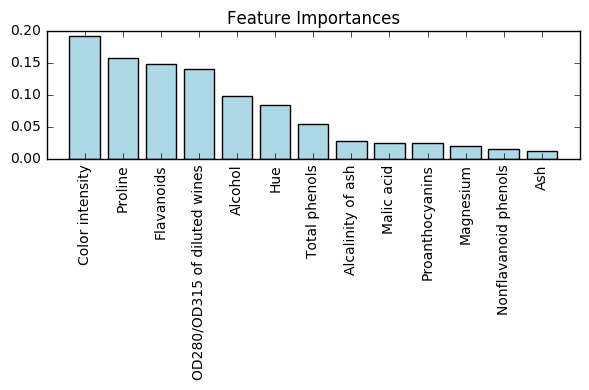

In [25]:
### Randomforest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 500, criterion = 'gini'
                             , max_features = 'auto',oob_score = True)
rfc.fit(X_train,y_train)
feat_labels = df_wine.columns[1:]
importances = rfc.feature_importances_

###  argsort函数返回的是数组值从小到大的索引值
##   np.argsort(importances)[::-1] 由大到小索引
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
    
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()


###  Model selection by feature importance

 1) Color intensity                0.214912
 2) Proline                        0.172515
 3) Flavanoids                     0.144737
 4) Alcohol                        0.089181
 5) Malic acid                     0.083333
 6) Magnesium                      0.076023
 7) Total phenols                  0.049708
 8) Hue                            0.043860
 9) Alcalinity of ash              0.035088
10) OD280/OD315 of diluted wines   0.032164
11) Ash                            0.027778
12) Nonflavanoid phenols           0.017544
13) Proanthocyanins                0.013158


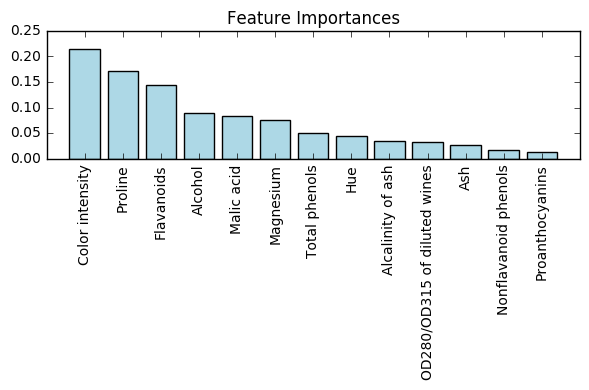

In [26]:
####　xgboost
feat_labels_xgb = df_wine.columns[1:]
importances_xgb = gbm.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels_xgb[indices_xgb[f]], 
                            importances_xgb[indices_xgb[f]]))
    
    
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances_xgb[indices_xgb],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels_xgb[indices_xgb], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

###  Model selection by feature importance